In [105]:
import PIL
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


def get_one_cluster(arr, size, start_row, start_col, diff, visited):
    stack = [(None, (start_row, start_col))]
    cluster = np.full(size, False)
    while stack:
        prev, curr = stack.pop()
        if not visited[*curr]:
            if not prev or (np.linalg.norm(arr[*curr] - arr[*prev]) <= diff):
                cluster[*curr] = True
                visited[*curr] = True
                row, col = curr
                if row + 1 < size[0]: stack.append((curr, (row + 1, col)))
                if row - 1 >= 0: stack.append((curr, (row - 1, col)))
                if col + 1 < size[1]: stack.append((curr, (row, col + 1)))
                if col - 1 >= 0: stack.append((curr, (row, col - 1)))
    return cluster, visited


def get_clusters(img, diff, treshold):
    arr = np.array(img, dtype=np.int64)
    clusters = []
    visited = np.full(img.size, False)
    for row in range(img.size[0]):
        for col in range(img.size[1]):
            if not visited[row, col]:
                cluster, visited = get_one_cluster(arr, img.size, row, col, diff, visited)
                if cluster.sum() > treshold:
                    clusters.append(cluster)
    return clusters


def add_clusters(clusters):
    res = np.zeros(clusters[0].shape, dtype=int)
    for num, cluster in enumerate(clusters, start=1):
        res += cluster * num
    return res


def reconstruct_avg(original, clusters):
    arr = np.array(original, dtype=np.uint8)
    for cluster in clusters:
        avg = np.average(arr, (0, 1,), weights=cluster)
        arr[cluster] = avg
    arr[~sum(clusters).astype(np.True_)] = [0, 0, 0]
    return arr

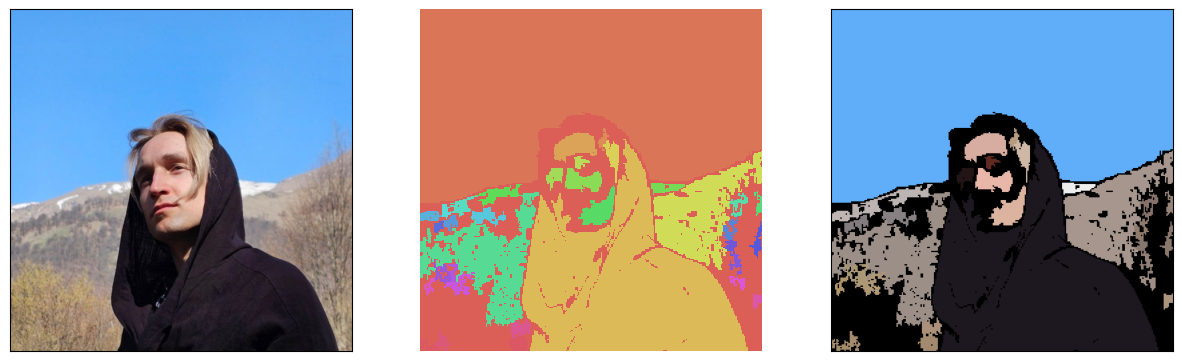

In [112]:
ava = PIL.Image.open('ava.jpeg')
size = (256, 256)
ava_small = ava.resize((size))

clusters = get_clusters(ava_small, 10, 50)
res = add_clusters(clusters)
averaged = reconstruct_avg(ava_small, clusters)
averaged_img = PIL.Image.fromarray(averaged)

fig, (axe1, axe2, axe3) = plt.subplots(1, 3)
fig.set_size_inches(15, 75)
axe1.get_xaxis().set_visible(False)
axe1.get_yaxis().set_visible(False)
axe1.imshow(ava)
sns.heatmap(res, yticklabels=False, xticklabels=False, square=True, cmap=sns.color_palette('hls', len(clusters)), cbar=False, ax=axe2)
axe3.get_xaxis().set_visible(False)
axe3.get_yaxis().set_visible(False)
axe3.imshow(averaged_img)